In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose([transforms.ToTensor(),
  transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.FashionMNIST('./fashion_mnist', train = True, transform=transform, download=True)
trainloader = torch.utils.data.DataLoader(trainset, shuffle=True, batch_size=30)

testset = torchvision.datasets.FashionMNIST('./fashion_mnist', train=False, transform=transform, download=True)
testloader = torch.utils.data.DataLoader(testset, shuffle=False, batch_size=30)

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle-boot']

Extracting ./fashion_mnist/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./fashion_mnist/FashionMNIST/raw


Extracting ./fashion_mnist/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./fashion_mnist/FashionMNIST/raw


Extracting ./fashion_mnist/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./fashion_mnist/FashionMNIST/raw


Extracting ./fashion_mnist/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./fashion_mnist/FashionMNIST/raw
Processing...
Done!






/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [2]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([30, 1, 28, 28])
torch.Size([30])


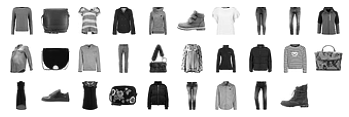

In [3]:
import matplotlib.pyplot as plt

figure = plt.figure()
num_of_images = 30
for index in range(1, num_of_images):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [4]:
from torch import nn, optim
import torch.nn.functional as F 

class FashionMnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(784, 256)
        self.l2 = nn.Linear(256, 128)
        self.l3 = nn.Linear(128,64)
        self.l4 = nn.Linear(64,10)
    def forward(self,x):
        x = x.view(x.shape[0],-1)
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))
        x = F.relu(self.l3(x))
        x = F.log_softmax(self.l4(x), dim=1)
        return x

model = FashionMnistModel()

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cuda:0


FashionMnistModel(
  (l1): Linear(in_features=784, out_features=256, bias=True)
  (l2): Linear(in_features=256, out_features=128, bias=True)
  (l3): Linear(in_features=128, out_features=64, bias=True)
  (l4): Linear(in_features=64, out_features=10, bias=True)
)

In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:  # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

PATH = './fashion_mnist_net.pth'
torch.save(model.state_dict(), PATH)

[1,  2000] loss: 0.990
[2,  2000] loss: 0.506
[3,  2000] loss: 0.442
[4,  2000] loss: 0.408
[5,  2000] loss: 0.381
[6,  2000] loss: 0.361
[7,  2000] loss: 0.343
[8,  2000] loss: 0.329
[9,  2000] loss: 0.317
[10,  2000] loss: 0.306
[11,  2000] loss: 0.295
[12,  2000] loss: 0.286
[13,  2000] loss: 0.277
[14,  2000] loss: 0.269
[15,  2000] loss: 0.262
[16,  2000] loss: 0.256
[17,  2000] loss: 0.248
[18,  2000] loss: 0.241
[19,  2000] loss: 0.236
[20,  2000] loss: 0.227
Finished Training


In [7]:
import matplotlib.pyplot as plt
import numpy as np

def img_show(img):
    img = img / 2 + 0.5  # un-normalize (mean = 0.5, std = 0.5)
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)))
    plt.show()

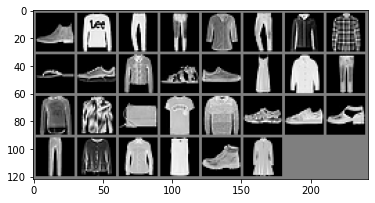

GroundTruth:  Ankle-boot Pullover Trouser Trouser
Predicted:  Ankle-boot Pullover Trouser Trouser
Accuracy of the network on the 10000 test images: 88 %
Accuracy of T-shirt/top : 85 %
Accuracy of Trouser : 94 %
Accuracy of Pullover : 82 %
Accuracy of Dress : 93 %
Accuracy of  Coat : 82 %
Accuracy of Sandal : 96 %
Accuracy of Shirt : 64 %
Accuracy of Sneaker : 96 %
Accuracy of   Bag : 98 %
Accuracy of Ankle-boot : 94 %


In [8]:
dataiter = iter(testloader)
images, labels = dataiter.next()
images, labels = images.to(device), labels.to(device)
# print images
img_show(torchvision.utils.make_grid(images.cpu()))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

model.load_state_dict(torch.load(PATH))
outputs = model(images)

_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                                  for j in range(4)))

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
            100 * correct / total))

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(9):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

In [13]:
import matplotlib.pyplot as plt
from torch.autograd import Variable
from PIL import Image

def inversion(model, label):
  iteration = 1000
  x = torch.zeros(1, 28, 28) # initialization
  x = Variable(x.cuda(), requires_grad=True)
  model.zero_grad()
  for i in range(iteration):
    out = model(x)
    loss = out.take(label)
    loss.backward()
    x.data = x.data - 0.1 * x.grad.data
    x.grad.zero_()
  x = x.data.squeeze()
  recon_img = x.cpu().resize_(1, 28, 28).numpy().squeeze()
  return recon_img


tensor(5, device='cuda:0')
Actual Image 0


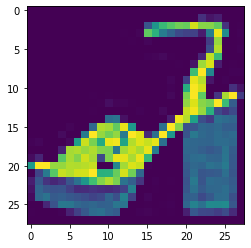

Reconstructed Image 0


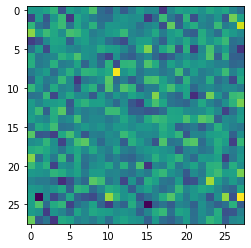

tensor(6, device='cuda:0')
Actual Image 1


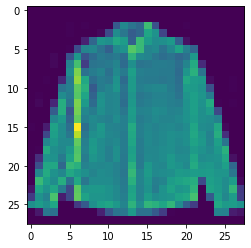

Reconstructed Image 1


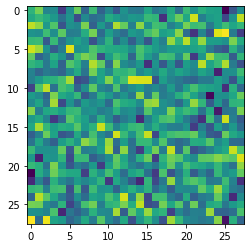

tensor(9, device='cuda:0')
Actual Image 2


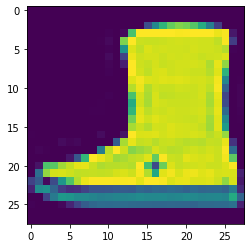

Reconstructed Image 2


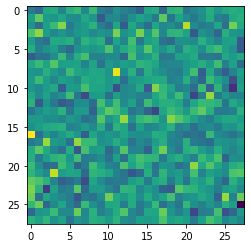

tensor(2, device='cuda:0')
Actual Image 3


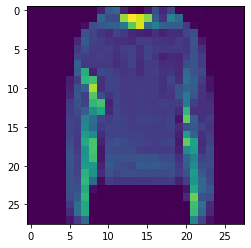

Reconstructed Image 3


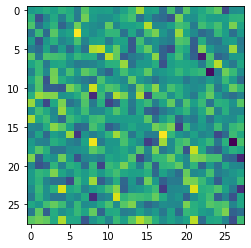

tensor(6, device='cuda:0')
Actual Image 4


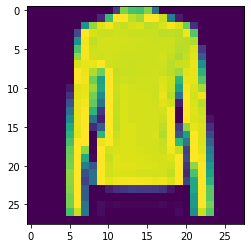

Reconstructed Image 4


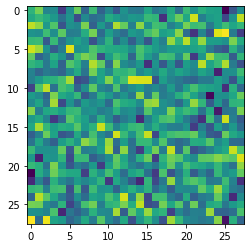

In [18]:
import matplotlib.pyplot as plt

testdata_iter = iter(testloader)
images, labels = dataiter.next()
images, labels = images.to(device), labels.to(device)

model = FashionMnistModel()

for i in range(5):
  image = images[i]
  label = labels[i]
  print(label)

  print("Actual Image", i)
  plt.imshow(image.cpu().squeeze())
  plt.show()

  print("Reconstructed Image", i)
  recon_image = inversion(model.to(device), label)
  plt.imshow(recon_image)
  plt.show()